In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [5]:
stocks=input('Enter stock: ')
data=yf.download(stocks, "2018-01-01","2022-07-19",auto_adjust=True)
data.head()

Enter stock: GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,1302.300049,1317.599976,1302.300049,1313.699951,68
2018-01-03,1320.000000,1320.099976,1312.099976,1316.199951,42
2018-01-04,1319.400024,1322.000000,1319.400024,1319.400024,2
2018-01-05,1320.300049,1320.300049,1320.300049,1320.300049,1
2018-01-08,1319.900024,1319.900024,1314.599976,1318.599976,41


In [6]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,1302.300049,1317.599976,1302.300049,1313.699951,68
2018-01-03,1320.000000,1320.099976,1312.099976,1316.199951,42
2018-01-04,1319.400024,1322.000000,1319.400024,1319.400024,2
2018-01-05,1320.300049,1320.300049,1320.300049,1320.300049,1
2018-01-08,1319.900024,1319.900024,1314.599976,1318.599976,41
...,...,...,...,...,...
2022-07-12,1734.199951,1735.500000,1723.300049,1723.300049,451
2022-07-13,1710.000000,1734.199951,1710.000000,1734.199951,368
2022-07-14,1710.300049,1710.500000,1704.500000,1704.500000,1289


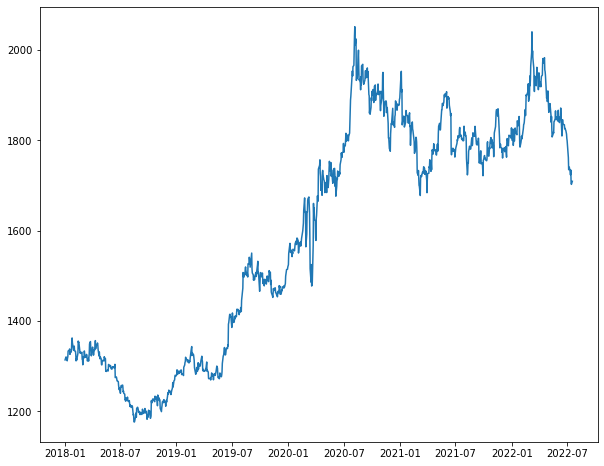

In [7]:
plt.figure(figsize=(10,8))
plt.plot(data.index,data.Close)
plt.show()

## Building the Model

In [8]:
x=data.drop('Close',axis=1)
y=data.Close

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
predictions=model.predict(x_test)

In [15]:
y_test[0]

1186.800048828125

In [16]:
predictions[0]

1188.665011297819

In [17]:
score=model.score(x_train,y_train)*100

In [18]:
score

99.95434879426425

In [29]:
al=pd.DataFrame(predictions,columns=['predictions'])

In [31]:
al['Target']=y_test

In [32]:
al

,predictions,Target
0,3.064451,NaN
1,4.182383,NaN
2,2.775818,NaN
3,4.640575,NaN
4,2.590793,NaN
...,...,...
223,2.672352,NaN
224,1.955440,NaN
225,2.677518,NaN
226,2.330004,NaN


## Using the Lasso and the Ridge algorithm

In [34]:
from sklearn.linear_model import Lasso,Ridge

In [36]:
la=Lasso().fit(x_train,y_train)
ri=Ridge().fit(x_train,y_train)

In [37]:
la_p=la.predict(x_test)
ri_p=ri.predict(x_test)

In [38]:
la_p[0]

3.2466066251111343

In [42]:
la.score(x_train,y_train)

0.7872549812053768

In [39]:
ri_p[0]

3.0671372201740237

In [44]:
ri.score(x_train,y_train)*100

99.81649168232802

In [40]:
predictions[0]

3.064451444826443

In [41]:
y_test[0]

3.069000005722046

In [48]:
import joblib

joblib.dump(ri,'model.pkl')
r_f=model=joblib.load('model.pkl')